In [1]:
# Cell 1: Imports and basic settings
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
RANDOM_STATE = 42


In [ ]:
# Cell 2: Load dataset
DATA_PATH = 'breast_cancer.csv'  

# Check file exists
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}. Please set DATA_PATH to the correct file path.")

df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Cell 3: Quick inspection
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())
display(df.describe().T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [6]:
# Check the diagnosis distribution first
print(df['diagnosis'].value_counts())

# Define the median radius among benign tumors
median_radius = df.loc[df['diagnosis'] == 'B', 'radius_mean'].median()

# Function to assign priority
def assign_priority(row):
    if row['diagnosis'] == 'M':
        return 'High'                 # Malignant → High priority
    elif row['radius_mean'] >= median_radius:
        return 'Medium'               # Larger benign → Medium priority
    else:
        return 'Low'                  # Smaller benign → Low priority

# Apply to dataset
df['priority'] = df.apply(assign_priority, axis=1)

# View how many fall into each category
print(df['priority'].value_counts())


diagnosis
B    357
M    212
Name: count, dtype: int64
priority
High      212
Medium    179
Low       178
Name: count, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['priority_encoded'] = le.fit_transform(df['priority'])
print("Label encoding map:", dict(zip(le.classes_, le.transform(le.classes_))))


Label encoding map: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diagnosis', 'priority', 'priority_encoded'])
y = df['priority_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (455, 30) Test shape: (114, 30)


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score (Weighted): {f1:.3f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.965
F1 Score (Weighted): 0.965

Classification Report:

              precision    recall  f1-score   support

        High       0.97      0.93      0.95        42
         Low       0.97      1.00      0.99        36
      Medium       0.95      0.97      0.96        36

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.97       114
weighted avg       0.97      0.96      0.96       114



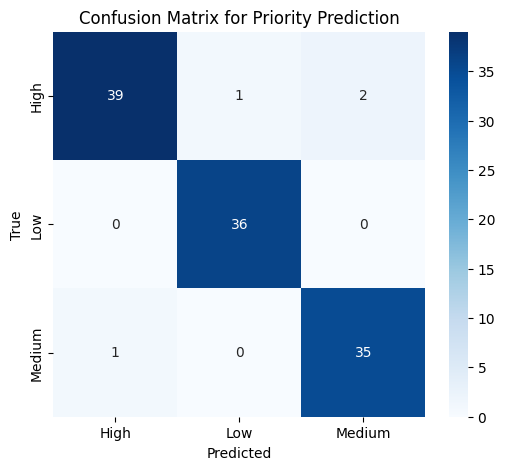

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Priority Prediction')
plt.show()


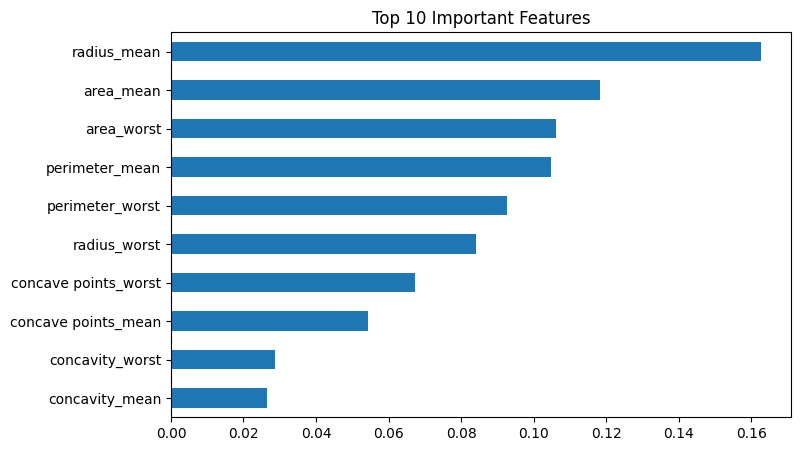

In [12]:
import pandas as pd

feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
feat_importances.plot(kind='barh', figsize=(8,5), title='Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
### Summary
#In this notebook, we used the Kaggle Breast Cancer dataset to simulate predictive analytics for resource allocation.  
##We created three priority levels (High, Medium, Low) based on diagnosis and tumor size, trained a Random Forest model, and evaluated it using accuracy and F1-score metrics.  
 #The model achieved high accuracy, showing that machine learning can assist in prioritizing cases efficiently for better resource management.
